In [2]:
from functools import reduce
import pandas as pd
import numpy as np
import itertools as itr
import math
import siuba
from siuba import _, mutate
import plotnine
from plotnine import aes, ggplot, geom_point
from siuba.data import cars, cars_sql

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [6]:
cars.corr()

,cyl,mpg,hp
cyl,1.000000,-0.852162,0.832447
mpg,-0.852162,1.000000,-0.776168
hp,0.832447,-0.776168,1.000000


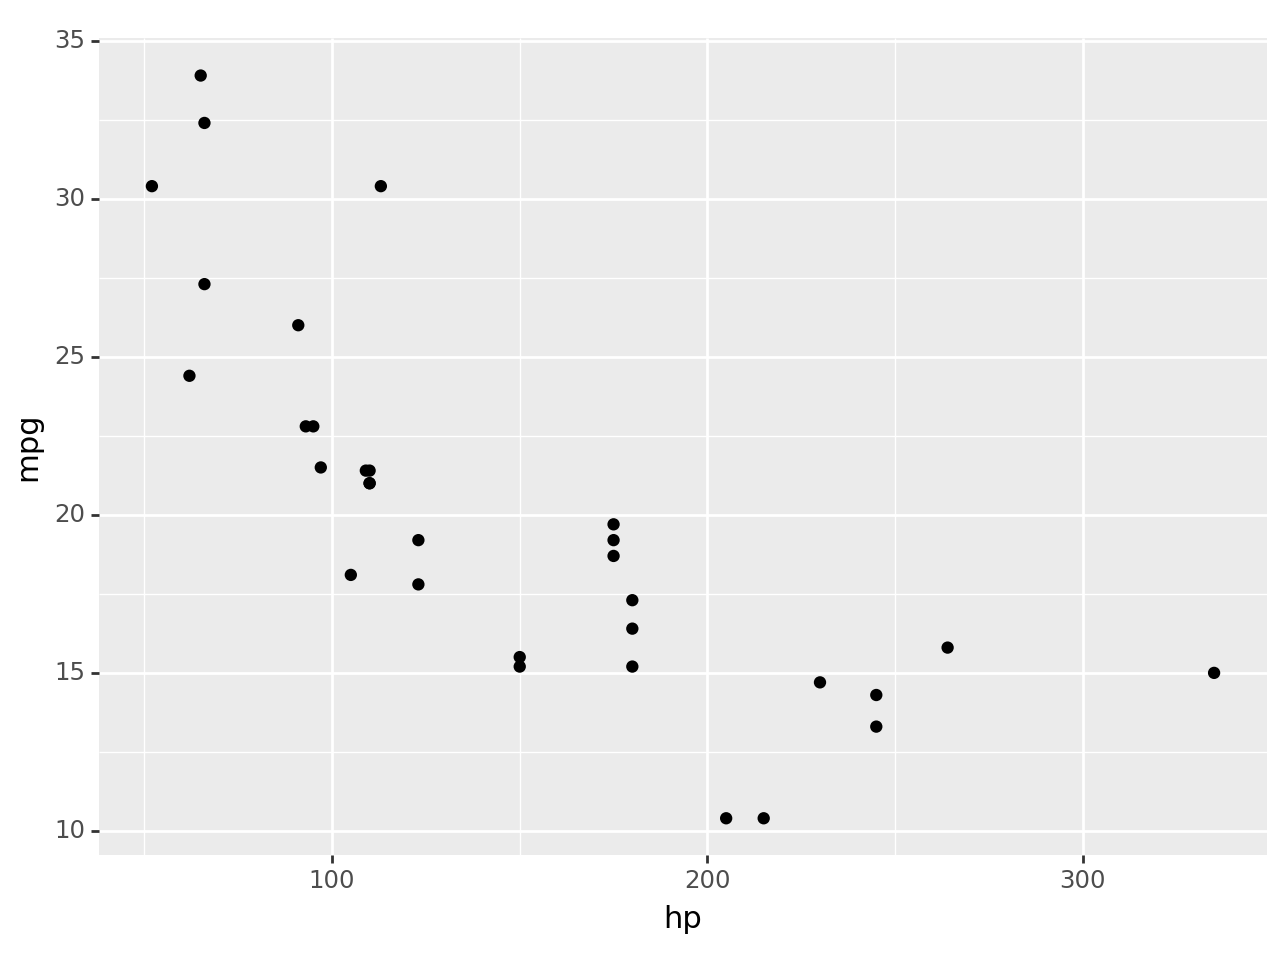

<Figure Size: (640 x 480)>

In [10]:
(
cars >> 
    ggplot(mapping = aes(x='hp', y='mpg', group='cyl')) +
    plotnine.geom_point()
    
)

In [13]:
model_1 = sm.OLS(cars['hp'], cars['mpg'])

In [14]:
model_1

In [17]:
results = model_1.fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     hp   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              47.98
Date:                Sat, 14 Oct 2023   Prob (F-statistic):                    9.06e-08
Time:                        13:44:15   Log-Likelihood:                         -193.14
No. Observations:                  32   AIC:                                      388.3
Df Residuals:                      31   BIC:                                      389.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mpg            6.0078      0.867      6.927      0.000       4.239       7.777
==============================================================================
Omnibus:                        1.128   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.980
Skew:                           0.209   Prob(JB):                        0.613
Kurtosis:                       2.251   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.595   
Dependent Variable:     hp               AIC:                         388.2792
Date:                   2023-10-14 13:46 BIC:                         389.7450
No. Observations:       32               Log-Likelihood:              -193.14 
Df Model:               1                F-statistic:                 47.98   
Df Residuals:           31               Prob (F-statistic):          9.06e-08
R-squared (uncentered): 0.608            Scale:                       10563.  
------------------------------------------------------------------------------------
           Coef.        Std.Err.         t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
mpg        6.0078         0.8673       6.9269       0.0000       4.2389       7.7766
------------------------------------------------------------------------------
Omnibus:                   1.128            Durbin-Watson:               1.301
Prob(Omnibus):             0.569            Jarque-Bera (JB):            0.980
Skew:                      0.209            Prob(JB):                    0.613
Kurtosis:                  2.251            Condition No.:               1    
==============================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

In [24]:
results.params

mpg    6.007751
dtype: float64

In [26]:
prd = results.get_prediction([1,2])

In [27]:
prd.predicted_mean

array([ 6.00775086, 12.01550172])

In [34]:
results.params['mpg']

6.007750861503557

In [36]:
type(results.params)

pandas.core.series.Series

In [38]:
type(np.array(range(3)))

numpy.ndarray

In [45]:
results.params.loc

6.007750861503557